<a href="https://colab.research.google.com/github/alice202122/Thesis/blob/main/Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from IPython.display import Image, display
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.cm as cm
import cv2 #image operations


In [4]:
import pickle
import os
import random
import pandas as pd
import seaborn as sns
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from PIL import Image

from tensorflow.keras import layers, models, backend, applications, regularizers, initializers
from tensorflow.keras.layers import Layer

from tensorflow.python.ops import math_ops

from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from sklearn.utils import class_weight
from keras import layers, Sequential
from keras.layers import Input, Add, Dense, Activation, ZeroPadding1D, Flatten, GlobalAveragePooling1D,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout,concatenate, BatchNormalization, Reshape
from keras.models import Model
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers


tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.8.2


In [5]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [6]:
%cd /content/drive/MyDrive/Tesi

/content/drive/MyDrive/Tesi


In [12]:
 !unzip dataH_UNH-SVP.zip

Archive:  dataH_UNH-SVP.zip
replace dataH_UNH-SVP/test/HEALTHY/_barnaba_riccardo__7_Angio Retina_OD_2016-01-21_15-45-31_M_1942-08-03_Enface-304x304-Superficial.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataH_UNH-SVP/test/HEALTHY/_barnaba_riccardo__7_Angio Retina_OD_2016-01-21_15-45-31_M_1942-08-03_Enface-304x304-Superficial.png  
  inflating: dataH_UNH-SVP/test/HEALTHY/1001_guglielmi_anna lucia__318_Angio Retina_OD_2016-06-20_17-55-17_F_1949-01-05_Enface-304x304-Superficial.png  
  inflating: dataH_UNH-SVP/test/HEALTHY/1001_guglielmi_anna lucia__318_Angio Retina_OS_2016-06-20_17-58-20_F_1949-01-05_Enface-304x304-Superficial.png  
  inflating: dataH_UNH-SVP/test/HEALTHY/1002_Di Carlo_Fonte__427_Angio Retina_OD_2016-10-10_17-19-13_F_1948-07-21_Enface-304x304-Superficial.png  
  inflating: dataH_UNH-SVP/test/HEALTHY/1002_Di Carlo_Fonte__427_Angio Retina_OS_2016-10-10_17-22-54_F_1948-07-21_Enface-304x304-Superficial.png  
  inflating: dataH_UNH-SVP/test/HEALTHY/1005_mazzara

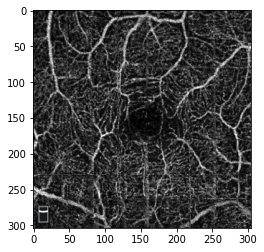

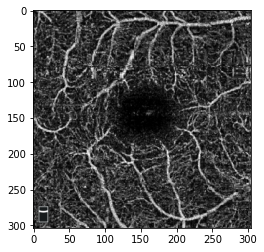

In [8]:
DATADIR = "/content/drive/MyDrive/Tesi/dataH_UNH-SVP"
FOLDERS= ['training', 'validation', 'test']
CATEGORIES=['HEALTHY', 'UNHEALTHY']
NEW_CATEGORIES= ['H_C','UNH_C']
for folder in FOLDERS:
    path = os.path.join(DATADIR, folder)
    for category in CATEGORIES:
      img_path= os.path.join(path, category)
      for img in os.listdir(img_path):
        img_array = cv2.imread(os.path.join(img_path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break
    break

        

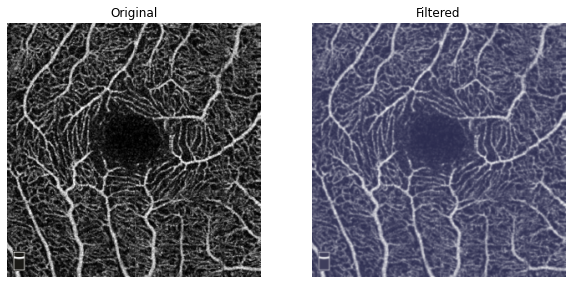

In [18]:
#Gaussian
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio
from matplotlib import pyplot as plt
from skimage import io
from scipy import ndimage as nd

noisy_img = img_as_float(io.imread("dataH_UNH-SVP/validation/UNHEALTHY/1608_romanazzi_maria__596_Angio Retina_OD_2017-03-16_10-18-50_F_1947-10-02_Enface-304x304-Superficial.png"))
#Need to convert to float as we will be doing math on the array
#Also, most skimage functions need float numbers
#ref_img = img_as_float(io.imread("images/MRI_images/MRI_clean.tif"))
                    
gaussian_img = nd.gaussian_filter(noisy_img, sigma=0.6)
fig = plt.figure(figsize=(10, 20))

ax1 = fig.add_subplot(2, 2, 1)
ax1.axis("off")
ax1.title.set_text('Original')
ax2 = fig.add_subplot(2, 2, 2)
ax2.axis("off")
ax2.title.set_text("Filtered")

ax1.imshow(noisy_img, cmap='gray')
ax2.imshow(gaussian_img, cmap='gray')

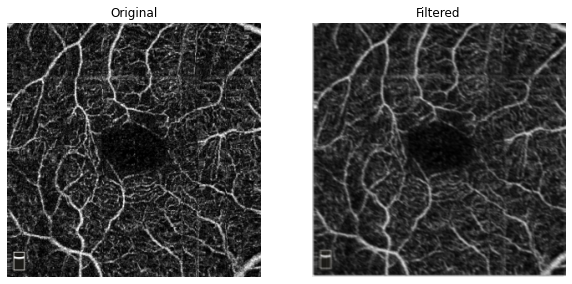

In [34]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)


noisy_img = img_as_float(io.imread("dataH_UNH-SVP/validation/UNHEALTHY/1554_cassone_vittoria__560_Angio Retina_OD_2017-02-16_10-14-41_F_1951-03-01_Enface-304x304-Superficial.png"))
sigma_est = estimate_sigma(noisy_img, multichannel=True, average_sigmas=True)

denoise_bilateral = denoise_bilateral(noisy_img, sigma_spatial=0.8,
                multichannel=True)
fig = plt.figure(figsize=(10, 20))

ax1 = fig.add_subplot(2, 2, 1)
ax1.axis("off")
ax1.title.set_text('Original')
ax2 = fig.add_subplot(2, 2, 2)
ax2.axis("off")
ax2.title.set_text("Filtered")

ax1.imshow(noisy_img, cmap='gray')
ax2.imshow(denoise_bilateral, cmap='gray')

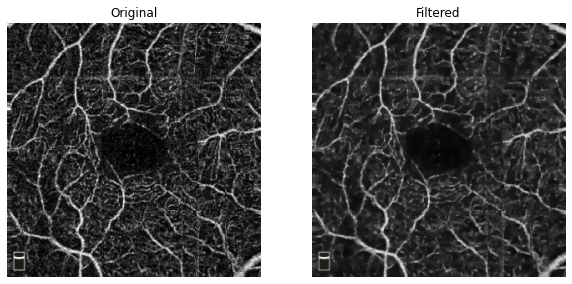

In [30]:
denoise_TV = denoise_tv_chambolle(noisy_img, weight=0.05, multichannel=True)
fig = plt.figure(figsize=(10, 20))

ax1 = fig.add_subplot(2, 2, 1)
ax1.axis("off")
ax1.title.set_text('Original')
ax2 = fig.add_subplot(2, 2, 2)
ax2.axis("off")
ax2.title.set_text("Filtered")

ax1.imshow(noisy_img, cmap='gray')
ax2.imshow(denoise_TV, cmap='gray')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


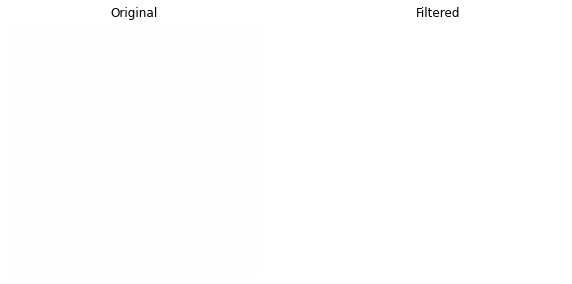

In [33]:

wavelet_smoothed = denoise_wavelet(noisy_img, multichannel=True,
                           method='BayesShrink', mode='soft',
                           rescale_sigma=True)
fig = plt.figure(figsize=(10, 20))

ax1 = fig.add_subplot(2, 2, 1)
ax1.axis("off")
ax1.title.set_text('Original')
ax2 = fig.add_subplot(2, 2, 2)
ax2.axis("off")
ax2.title.set_text("Filtered")

ax1.imshow(noisy_img, cmap='gray')
ax2.imshow(wavelet_smoothed, cmap='gray')

In [36]:
pip install medpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 151 kB 27.3 MB/s 
     |████████████████████████████████| 48.4 MB 1.7 MB/s 
  Created wheel for medpy: filename=MedPy-0.4.0-cp37-cp37m-linux_x86_64.whl size=754455 sha256=0dc1311e66a0c19c62b4a25153aaf8fb9ae49bea2ad6360ff3553b4273a7e42c
  Stored in directory: /root/.cache/pip/wheels/b0/57/3a/da1183f22a6afb42e11138daa6a759de233fd977a984333602
Successfully built medpy


/usr/local/lib/python3.7/dist-packages/medpy/filter/smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
/usr/local/lib/python3.7/dist-packages/medpy/filter/smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)


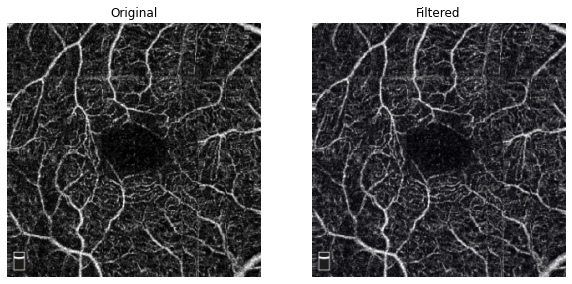

In [44]:
from medpy.filter.smoothing import anisotropic_diffusion
img_aniso_filtered = anisotropic_diffusion(noisy_img, niter=2, kappa=2, gamma=0.01, option=2) 
fig = plt.figure(figsize=(10, 20))

ax1 = fig.add_subplot(2, 2, 1)
ax1.axis("off")
ax1.title.set_text('Original')
ax2 = fig.add_subplot(2, 2, 2)
ax2.axis("off")
ax2.title.set_text("Filtered")

ax1.imshow(noisy_img, cmap='gray')
ax2.imshow(img_aniso_filtered, cmap='gray')

In [46]:
pip install bm3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.4 MB 22.8 MB/s 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


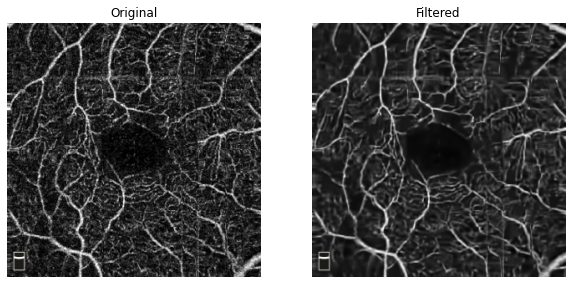

In [50]:
import bm3d
BM3D_denoised_image = bm3d.bm3d(noisy_img, sigma_psd=0.1, stage_arg=bm3d.BM3DStages.ALL_STAGES)
fig = plt.figure(figsize=(10, 20))

ax1 = fig.add_subplot(2, 2, 1)
ax1.axis("off")
ax1.title.set_text('Original')
ax2 = fig.add_subplot(2, 2, 2)
ax2.axis("off")
ax2.title.set_text("Filtered")

ax1.imshow(noisy_img, cmap='gray')
ax2.imshow(BM3D_denoised_image, cmap='gray')